# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


Initialize the agent to train. This time will be a DDPG one.

In [5]:
from ddpg_agent import Agent
agent = Agent(state_size=state_size*num_agents, action_size=action_size*num_agents, random_seed=10)

We'll now generate the training method...

In [6]:
def ddpg(n_episodes=1000, max_t=10000):
    """DDQN Algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): frequency of printing information throughout iteration """

    scores = []
    scores_deque = deque(maxlen=100)

    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations  # get the current state
        score = 0

        for t in range(max_t):
            state = np.array(np.array(state).flatten())
            action = agent.act(state)  # select an action

            env_info = env.step(action)[brain_name]  # send the action to the environment
            next_state = np.array(env_info.vector_observations).flatten()  # get the next state
            reward = np.max(env_info.rewards)  # get the reward
            done = env_info.local_done[0]  # see if episode has finished
            agent.step(state, action, reward, next_state, done)  # take step with agent (including learning)
            score += reward  # update the score
            state = next_state  # roll over the state to next time step
            if done:  # exit loop if episode finished
                break

        scores_deque.append(score)  # save most recent score
        scores.append(score)  # save most recent score

        if i_episode % 100 == 0:
            print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

        if np.mean(scores_deque) >= 0.5:
            print('\nEnvironment solved in {:d} Episodes \tAverage Score: {:.2f}'.format(i_episode,
                                                                                         np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    return scores

... and train!

In [7]:
scores = ddpg(n_episodes=5000)

Episode 100	Score: 0.00	Average Score: 0.00
Episode 200	Score: 0.00	Average Score: 0.00
Episode 300	Score: 0.00	Average Score: 0.00
Episode 400	Score: 0.00	Average Score: 0.00
Episode 500	Score: 0.00	Average Score: 0.00
Episode 600	Score: 0.00	Average Score: 0.00
Episode 700	Score: 0.00	Average Score: 0.00
Episode 800	Score: 0.00	Average Score: 0.00
Episode 900	Score: 0.00	Average Score: 0.00
Episode 1000	Score: 0.00	Average Score: 0.00
Episode 1100	Score: 0.00	Average Score: 0.00
Episode 1200	Score: 0.10	Average Score: 0.01
Episode 1300	Score: 0.00	Average Score: 0.00
Episode 1400	Score: 0.10	Average Score: 0.03
Episode 1500	Score: 0.00	Average Score: 0.02
Episode 1600	Score: 0.00	Average Score: 0.04
Episode 1700	Score: 0.00	Average Score: 0.02
Episode 1800	Score: 0.00	Average Score: 0.01
Episode 1900	Score: 0.10	Average Score: 0.03
Episode 2000	Score: 0.20	Average Score: 0.07
Episode 2100	Score: 0.10	Average Score: 0.08
Episode 2200	Score: 0.10	Average Score: 0.10
Episode 2300	Score:

We will now plot the performance of our nice algorithm:

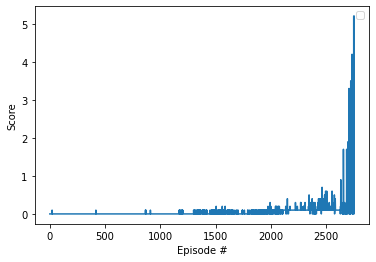

In [8]:
import matplotlib.pyplot as plt


def remove_noise(scores):
    """ 
    This method will flat a noisy plot 
    returns: array of scores less noisy
    """
    batch_size = 50  # The more, the less noisy
    output = []
    for i in range(len(scores)):
        batch = scores[i:i + batch_size]
        output.append(np.mean(batch))
        if i + batch_size >= len(scores):
            break

    return output


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

When finished, you can close the environment.

In [9]:
env.close()